In [1]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from dateutil.rrule import rrule, MONTHLY, WEEKLY, MO, TU, WE, TH, FR

np.random.seed(134)
pd.set_option('display.max_columns', None)  # or 1000
pd.options.display.max_rows = 999

plt.style.use('ggplot')
sm, med, lg = 10, 15, 20
plt.rc("font", size=sm)                     # controls default text sizes
plt.rc("axes", titlesize=med)               # fontsize of the axes title
plt.rc("axes", labelsize=med)               # fontsize of the x & y labels
plt.rc("xtick", labelsize=sm)               # fontsize of the tick labels
plt.rc("ytick", labelsize=sm)               # fontsize of the tick labels
plt.rc("legend", fontsize=sm)               # legend fontsize
plt.rc("figure", titlesize=lg)              # fontsize of the figure title
plt.rc("axes", linewidth=2)                 # linewidth of plot lines
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.dpi"] = 100

# plt.style.available

In [1]:
july_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                                '2021-07-14', '2021-07-15', '2021-07-16',
    '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
    '2021-07-26', '2021-07-27',               '2021-07-29', '2021-07-30',
]

august_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|--------------|-------------|--------------|
    '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
    '2021-08-09', '2021-08-10',                             '2021-08-13',
    '2021-08-16',                                           '2021-08-20',
    '2021-08-23',                             '2021-08-26', '2021-08-27',
                  '2021-08-31',
]

september_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                                              '2021-09-02', '2021-09-03',
                                '2021-09-08', '2021-09-09', '2021-09-10',
    '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
                  '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
    '2021-09-27', '2021-09-28',
]

october_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                                                            '2021-10-01',
    '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
    '2021-10-11',               '2021-10-13', '2021-10-14', '2021-10-15',
    '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
    '2021-10-25',               '2021-10-27', '2021-10-28', '2021-10-29',
]

november_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
    '2021-11-01', '2021-11-02', '2021-11-03',               '2021-11-05',
                                '2021-11-10', '2021-11-11', '2021-11-12',
    '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
                  '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
]

december_2021 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                                '2021-12-01', '2021-12-02', '2021-12-03',
    '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
    '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
    '2021-12-20', '2021-12-21',                             '2021-12-24',
]

january_2022 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
    '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
    '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
                  '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
                                '2022-01-26', '2022-01-27', '2022-01-28',
]

february_2022 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                                                            '2022-02-04',
    '2022-02-07',               '2022-02-09', '2022-02-10', '2022-02-11',
    '2022-02-14', '2022-02-15', '2022-02-16',               '2022-02-18',
                  '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
    '2022-02-28',
]

march_2022 = [
#     'MONDAY',   'TUESDAY',   'WEDNESDAY',  'THURSDAY',     'FRIDAY'
#  |------------|-------------|-------------|-------------|--------------|
                 '2022-03-01',                              '2022-03-04',
]


all_dates_list = [
    # july_2021,
    # august_2021,
    # september_2021,
    october_2021, 
    # november_2021,
    # december_2021,
    # january_2022,
    # february_2022,
    # march_2022,
]

days = []
for date_lists in all_dates_list:
    days += date_lists
print(len(days))


label = [
    # "maximum_sharpe_ratio", 
    "monte_carlo_cholesky"
]

def gather(days):
    main_dict = {}
    sums_lst = []
    for day in days:
        day = str(day)[:10]
        month = str(day)[:7]
        path1 = Path(f"/home/gdp/russell_3k/reports/port_results/{month}/{day}/")
        df = pd.read_csv(path1 / f"{label[0]}.csv")
        main_dict[day] = list(df['ticker'])
        for i in list(df['ticker']):
            sums_lst.append(i)
    return main_dict, sums_lst


daily_stock_picks_dict, sums_lst = gather(days)
print(len(daily_stock_picks_dict))

daily_stock_picks_df = pd.DataFrame.from_dict(daily_stock_picks_dict, orient='index').T
daily_stock_picks_df.head()

19


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '/home/gdp/russell_3k/reports/port_results/2021-10/2021-10-06/monte_carlo_cholesky.csv'

In [4]:
print(len(sums_lst))
sums_lst2 = sorted(list(set(sums_lst)))
print(len(sums_lst2))


temp_dict = {}
for s in sums_lst2:
    c = 0.0
    x = sums_lst.count(s)
    c += x
    temp_dict[s] = c


record_df = pd.DataFrame.from_dict(temp_dict, orient='index')
print(record_df.columns)
record_df.columns = ['count']
record_df.head()


155
26
RangeIndex(start=0, stop=1, step=1)


,count
A,2.0
BK,2.0
CARR,5.0
COF,6.0
CRL,20.0


18


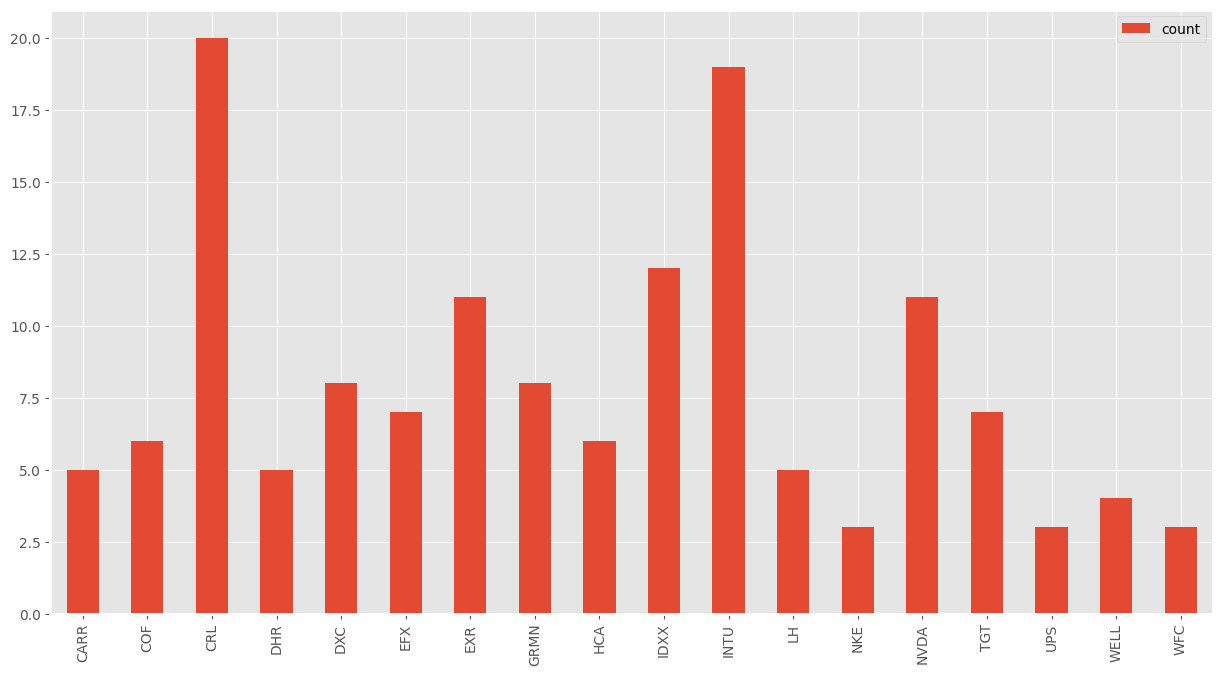

In [5]:
more_than_2 = record_df[record_df['count'] > 2.0]
print(len(more_than_2))
more_than_2.plot(kind='bar');

In [6]:
idx = 0
new_col = np.arange(1, len(daily_stock_picks_df)+1)
daily_stock_picks_df.insert(loc=idx, column='count', value=new_col)    

daily_stock_picks_df = daily_stock_picks_df.fillna("-")
daily_stock_picks_df = daily_stock_picks_df.set_index('count')

daily_stock_picks_df.to_csv(f"/home/gdp/russell_3k/reports/score_sheet/stock_lists_{label[0]}.csv")
daily_stock_picks_df

,2021-07-14,2021-07-15,2021-07-16,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-26,2021-07-27,2021-07-29,2021-07-30,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-09,2021-08-10,2021-08-13,2021-08-16,2021-08-20,2021-08-23,2021-08-26,2021-08-27,2021-08-31
count,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NVDA,NVDA,NVDA,NVDA,NVDA,HCA,EXR,EXR,EXR,HCA,HCA,HCA,HCA,HCA,EXR,EXR,CARR,NVDA,NVDA,NVDA,EXR,EXR,EXR,EXR,EXR,EXR
2,INTU,WELL,WELL,WELL,WELL,INTU,UPS,UPS,UPS,INTU,COF,TECH,TECH,COF,EFX,INTU,GRMN,WFC,WFC,WFC,LH,EW,BK,NVDA,NVDA,LLY
3,GNRC,INTU,INTU,INTU,INTU,TGT,CARR,CARR,GOOG,DXC,DXC,COF,COF,IDXX,INTU,CARR,CRL,INTU,DXC,DXC,GS,EFX,LH,BK,EFX,NVDA
4,-,IDXX,IDXX,IDXX,TGT,CRL,INTU,INTU,CARR,IDXX,IDXX,NKE,NKE,DXC,CRL,GRMN,-,DXC,COF,COF,EFX,DHR,EFX,EFX,INTU,LH
5,-,CRL,CRL,CRL,NKE,IDXX,TGT,TGT,INTU,CRL,CRL,DXC,DXC,CRL,TGT,CRL,-,CRL,CRL,CRL,INTU,INTU,DHR,DHR,LH,EFX
6,-,-,-,-,IDXX,-,IDXX,IDXX,TGT,-,-,CRL,CRL,-,IDXX,-,-,-,-,-,TGT,LH,INTU,INTU,GS,INTU
7,-,-,-,-,CRL,-,CRL,CRL,IDXX,-,-,-,-,-,-,-,-,-,-,-,DHR,A,A,GRMN,DHR,GRMN
8,-,-,-,-,-,-,-,-,CRL,-,-,-,-,-,-,-,-,-,-,-,GRMN,GRMN,GRMN,CRL,GRMN,-
